In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from kdg import kdf
from kdg.utils import generate_gaussian_parity, hellinger, plot_2dsim, generate_ood_samples, sample_unifrom_circle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from joblib import Parallel, delayed
from scipy.io import savemat, loadmat
from sklearn.metrics import roc_auc_score

import seaborn as sns

<AxesSubplot:>

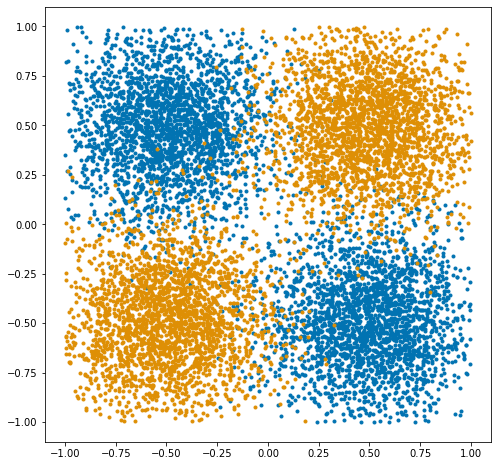

In [3]:
X, y = generate_gaussian_parity(10000)
plot_2dsim(X, y)

In [16]:
def experiment(trees):
    X, y = generate_gaussian_parity(10000)
    point_x = np.arange(0.5,4,.01)
    point_y = .5*np.ones(350)
    points = np.array([(x,y) for x,y in zip(point_x,point_y)])
    
    model_kdf = kdf(k=.4, kwargs={'n_estimators':trees})
    model_kdf.fit(X, y)
    
    polytope_ids = np.array(
                [tree.apply(points) for tree in model_kdf.rf_model.estimators_]
                ).T
    matched_samples = np.sum(
                    polytope_ids == polytope_ids[0],
                    axis=1
                )
    scales = matched_samples/np.max(matched_samples)
    return scales

In [17]:
trees = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
distance = np.arange(0,3.5,.01)
scales = np.zeros((len(nodes),len(distance)), dtype=float)

for ii,tree in enumerate(trees):
    print("doing ", tree," trees")
    scales[ii,:] = experiment(tree)

doing  100  trees
doing  200  trees
doing  300  trees
doing  400  trees
doing  500  trees
doing  600  trees
doing  700  trees
doing  800  trees
doing  900  trees
doing  1000  trees


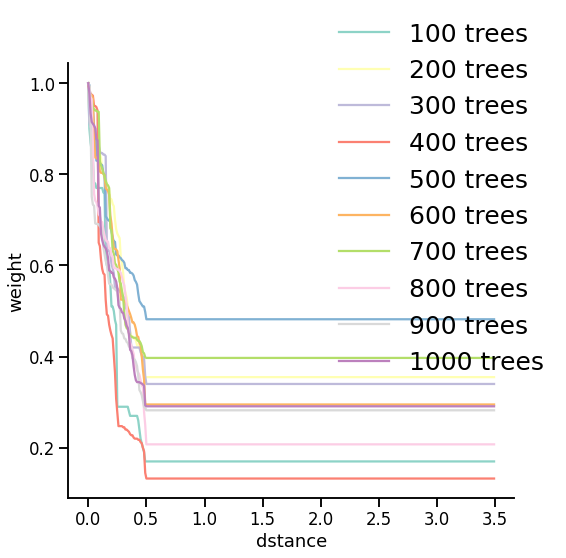

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.set_context('talk')
color = sns.color_palette("Set3", len(nodes))

for ii, node in enumerate(nodes):
    ax.plot(distance, scales[ii,:], c= color[ii], label=str(node)+' trees')
    
ax.set_xlabel('dstance')
ax.set_ylabel('weight')

right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

fig.legend(fontsize=25, frameon=False)